<a href="https://colab.research.google.com/github/MaricelaMH/Simulacion-1/blob/main/MC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

M-É-T-O-D-O   D-E   A-C-I-E-R-T-O   Y   E-R-R-O-R

El método de Montecarlo consiste en utilizar números aleatorios para aproximar soluciones de problemas matemáticos, como la integración numérica, en este caso usaremos el método de acierto y error para calcular la integral

$$\int_{0}^{1} \sqrt{arctan(x)} \ dx$$

* Primero calculamos la integral con ayuda de una calculadora para ver cual es su valor real y poder comparar los metodos que realizaremos, asi

$$\int_{0}^{1} \sqrt{arctan(x) } \ dx\approx 0.629823$$

Ahora aplicamos el método:

1. Tendremos que
$$ I = \int_{0}^{1} \sqrt{arctan(x)} $$

2. Generamos $N$ números aleatorios de $x_i$ uniformemente distribuidos en el intervalo $[0,1]$

3. Evaluamos la función $\sqrt{arctan(x)}$ en cada uno de los puntos generados asi:

$$ f(x_i)= \sqrt{arctan(x_i)}$$

4. Podemos decir que la integral es

$$ I \approx c(b-a) \frac{n_\alpha}{n}$$

donde $n_\alpha$ es el número dde puntos bajo o sobre la curva.

* Ademas calcularemos la probabilidad de acertar en la región bajo la curva es:

$$p = \frac{I}{c(b-a)}$$


In [238]:
# Importamos las paqueterias necesarias
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

In [239]:
# Definimos nuestra función f(x)
def f(x):
    return np.sqrt(np.arctan(x))

In [240]:
# Función para graficar los puntos y la curva
def grafica(x_puntos, y_puntos, abajo_curva):
    x = np.linspace(0, 1, 1000)
    y = f(x)
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='f(x) = sqrt(arctan(x))', color='blue')
    plt.scatter(x_puntos[abajo_curva], y_puntos[abajo_curva], color='blue', s=20, label='Puntos debajo de la curva')
    plt.scatter(x_puntos[~abajo_curva], y_puntos[~abajo_curva], color='red', s=20, label='Puntos encima de la curva')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Método de Monte Carlo de Acierto y Error')
    plt.legend()
    plt.show()

In [241]:
# Función para calcular y graficar la convergencia de la probabilidad

def probabilidad(abajo_curva, num_puntos):
    prob_acierto = np.cumsum(abajo_curva) / np.arange(1, num_puntos + 1)

    plt.figure(figsize=(10, 6))
    plt.plot(prob_acierto, label='Probabilidad de acierto')
    plt.axhline(y=np.mean(abajo_curva), color='red', linestyle='--', label='Valor esperado')

    plt.xlabel('Número de puntos')
    plt.ylabel('Probabilidad acumulada')
    plt.title('Convergencia de la probabilidad de acierto')
    plt.legend()
    plt.show()

In [242]:
# Función principal que calcula la integral usando el método de Monte Carlo
def monte_carlo_aci_error(a, b, num_puntos):

    # Generamos nuestros puntos aleatorios
    x_puntos = np.random.uniform(a, b, num_puntos)
    y_max = f(b)  # Suponemos que f(x) está acotada
    y_puntos = np.random.uniform(0, y_max, num_puntos)

    # Contamos los puntos que caen debajo de la curva f(x)
    abajo_curva = y_puntos < g(x_puntos)
    aux_num = np.sum(abajo_curva)

    # Estimamos el área bajo la curva
    area_curv = (b - a) * y_max
    integral_est1 = (aux_num / num_puntos) * area_curv

    # Llamamos a la función de graficar
    grafica(x_puntos, y_puntos, abajo_curva)

    # Lamamos la funcion de probabilidad
    probabilidad(abajo_curva, num_puntos)

    # Calculamos la media y el error estándar
    media = integral_est1
    p = aux_num / num_puntos
    varianza = p * (1 - p) / num_puntos
    SE = np.sqrt(varianza)

    # Calcular el intervalo de confianza del 95%
    z = 1.96
    in_inf = media - z * SE * area_curv
    in_sup = media + z * SE * area_curv

    return integral_est1, in_inf, in_sup

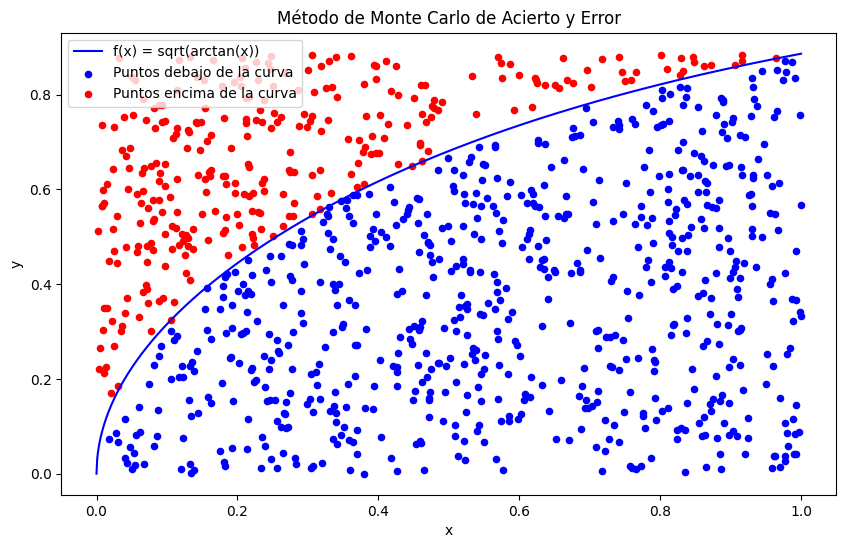

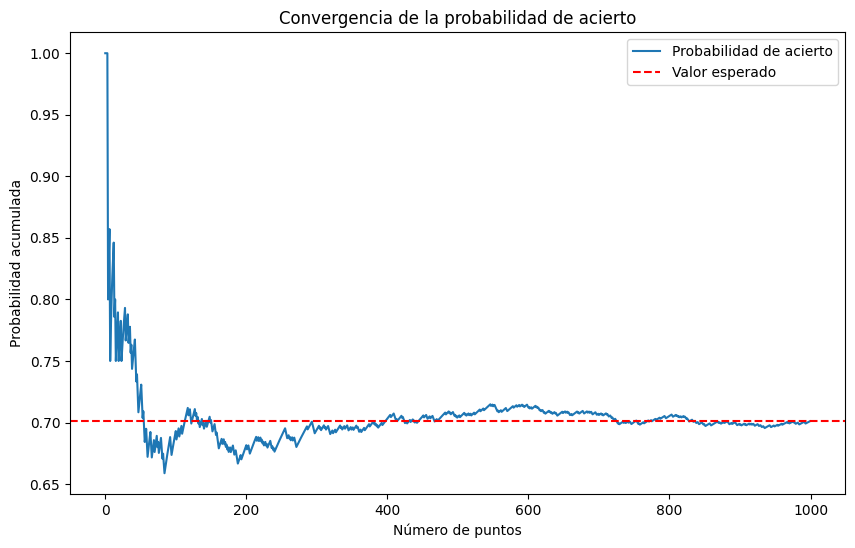

In [243]:
# Uso del método Monte Carlo
a = 0
b = 1
num_puntos = 1000
integral_est1, in_inf, in_sup = monte_carlo_aci_error(a, b, num_puntos)

In [244]:
print(f"Estimación de la integral: {integral_est1}")

Estimación de la integral: 0.6212450747423833


* Calcularemos el intervalo de confianza de la siguiente manera:

Sabemos que la media, en este caso es

$$ \mu = I $$

donde $I$ es igual a la estimación de la integral.

Ademas la varianza $\sigma^2$ es igual a:
$$ \sigma^2 =\frac{1}{N} [ c(b-a)-I]$$

Cuando $N$ se hace suficientemente grande y se aplica el teorema central del límite se tiene que el intervalo de confianza

$$ I \pm z*SE $$
donde ahora la varianza de la proporción de puntos bajo la curva, se basa en una distribución binomial, por lo que

$$\sigma^2 = \frac{p(1-p)}{N}$$

y el error estándar (SE) es la raíz cuadrada de la varianza dividida por el número de puntos.

* En este caso usaremos el valor crítico $z = 1.96$ para un intervalo de confianza del $95\%$.

NOTA: El procedimiento del intervalo se puede visualizar en la función de "monte_carlo_aci_error" , a continuación solo se visualizara el intervalo ya calculado.

In [245]:
print(f"Intervalo de confianza del 95%: [{in_inf}, {in_sup}]")

Intervalo de confianza del 95%: [0.5960975285136314, 0.6463926209711353]


Ahora veamos que pasa con el método de media muestral

M-É-T-O-D-O   D-E    M-É-D-I-A    M-U-E-S-T-R-A-L

El método de la media muestral de Montecarlo es una técnica numérica para estimar el valor de una integral utilizando muestras aleatorias, igual como se relizo con el método anterior.

* En este caso la aproximación de la integral utilizando el método de Montecarlo se expresa como:

$$\int_{0}^{1} \sqrt{arctan(x)} \ dx \approx \frac{1}{n} \sum_{i=1}^{n} \sqrt{arctan(x_i)}$$

donde $x_i$ son los puntos aleatorios generados.

La precisión del método depende de la distribución y cantidad de puntos aleatorios generados. En general, $n$ debe ser lo suficientemente grande para obtener una buena aproximación.


In [246]:
# Retomamos nuestra función f(x) definida al principio
# Implementamos el método de Monte Carlo
def monte_carlo_med(a, b, n):
    # Generar una secuencia {Ui}
    U = np.random.uniform(a,b,n)

    # Calculamos Xi = a + Ui * (b - a)
    X = a + U * (b - a)

    # Calculamos f(X)
    f_X = f(X)

    # Calculamos la media muestral θ1
    theta_1 = (b - a) * np.mean(f_X)

    # Calculamos la varianza y el error estándar
    var_theta = np.var(f_X)  # varianza muestral
    se_theta = np.sqrt(var_theta / n)  # error estándar de la media

    # Calcular el intervalo de confianza del 95%
    z2 = 1.96

     # Calculamos el margen de error
    margen_error = z2 * se_theta
    in_inf2 = theta_1 - margen_error
    in_sup2 = theta_1 + margen_error
    return theta_1

In [247]:
# Uso del método Monte Carlo
integral_est2 = monte_carlo_med(0,1,100)

* Para calcular el intervalo de confianza, definimos de igual manera un nivel de confianza al $95\%$ donde $z=1.96$.

* La media de las $n$ estimaciones es:

$$\mu = \frac{1}{n} \sum_{i=1}^{n} I_i $$

donde $I$ corresponde a las estimaciones.

* Asi la varianza de las estimaciones es:

$$\sigma^2 = \frac{1}{n-1} \sum_{i=1}^{n} (I_i - \mu)^2$$

Por lo que el error estándar de la media $SE$ se calcula como:
$$SE = \frac{\sigma}{\sqrt{n}} $$

y el margen de error multiplicando el error estándar por $z^*$

$$ ME = z^* (SE) $$

Finalmente el intervalo de confianza sera

$$ I \pm ME $$

Realizamos los calculos.


In [248]:
print(f"Intervalo de confianza del 95%: [{in_inf2}, {in_sup2}]")

Intervalo de confianza del 95%: [0.577069916758502, 0.6618518589872402]


In [249]:
print(f"Estimación de la integral: {integral_est2}")

Estimación de la integral: 0.6495652444364497


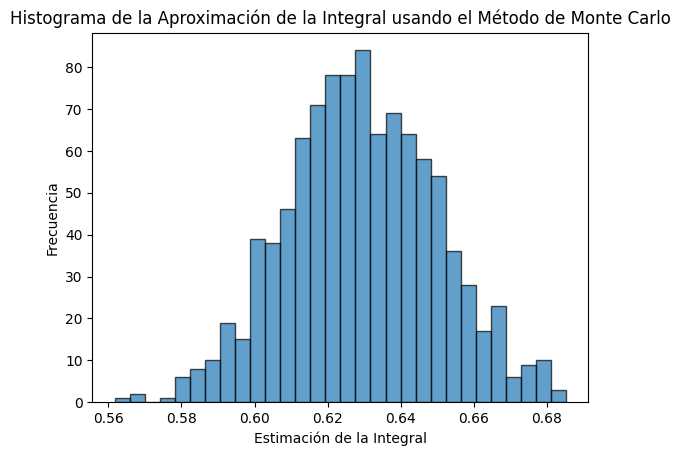

In [250]:
aux = 1000  # Número de estimaciones para el histograma

# Generamos múltiples estimaciones de la integral
integral_est3 = [monte_carlo_med(0, 1, 100) for _ in range(aux)]

# Graficamos el histograma de las estimaciones de la integral
plt.hist(integral_est3, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histograma de la Aproximación de la Integral usando el Método de Monte Carlo')
plt.xlabel('Estimación de la Integral')
plt.ylabel('Frecuencia')
plt.show()

Podemos ver que se sigue una distribución normal

M-E-T-O-D-O  D-E. S-U-M-A-S  D-E  R-I-M-M-A-N

Opcionalmente agragamos este método, solo para comparación

In [251]:
# Definimos una funcion para calcular la suma de Riemann
def suma_riemann(a, b, n):
    # Calculamos la longitud de cada subintervalo
    delta_x = (b - a) / n

    # Calculamos los puntos medios de cada subintervalo
    puntos_medios = np.linspace(a + delta_x / 2, b - delta_x / 2, n)

    # Evaluamos la función f(x) en los puntos medios
    valores_funcion = f(puntos_medios)

    # Calculamos la suma de Riemann
    suma = np.sum(valores_funcion * delta_x)

    return suma, puntos_medios, valores_funcion, delta_x

In [252]:
# Calculamos la suma de Riemann y obtenemos los puntos de evaluación
suma, puntos_medios, valores_funcion, delta_x = suma_riemann(0, 1, 20)
print("Aproximación de la integral:", suma)

Aproximación de la integral: 0.6304747505926849


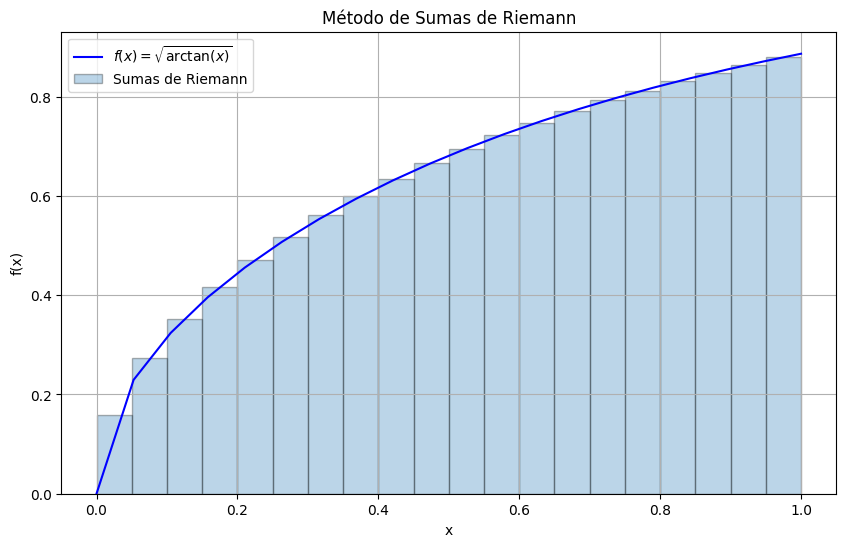

In [253]:
# Graficamos la función f(x)
x = np.linspace(0, 1, 20)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label=r'$f(x) = \sqrt{\arctan(x)}$', color='blue')
plt.bar(puntos_medios, valores_funcion, width=delta_x, alpha=0.3, align='center', edgecolor='black', label='Sumas de Riemann')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(r'Método de Sumas de Riemann')
plt.legend()
plt.grid(True)
plt.show()


CONCLUSIÓN

Veamos que el metodo que mejor se aproxima al valor de la integral comparando el metodo de (acierto y error vs  edia muestral) es el método de acierto y error, dado que de copilo varias veces, se pudo observar que es el que necesita un número menor de muestras para estimar el valor real de la integral.

Finalmente si se toma en cuenta el ultimo método adicional agregado (sumas de riemman) este es el mejor metódo , dado que usaria menos muestras que el método de acierto y error.